In [5]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [13]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise = 20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(y.shape)
y = y.view(y.shape[0], 1)
print(y.shape)
n_samples = X.shape[0]
print(n_samples)
n_features = X.shape[1]
print(n_features)
output_size = y.shape[1]

torch.Size([100])
torch.Size([100, 1])
100
1


In [29]:
#model
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.layer = nn.Linear(input_dim,output_dim)
    def forward(self,x):
        return self.layer(x)
model = LinearRegression(n_features, output_size)

In [30]:
#loss and optimizer
learning_rate=0.01
loss_criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [34]:
#training loop
num_epoch =1000
for epoch in range(num_epoch):
    y_predicted = model(X)
    loss = loss_criterion(y_predicted,y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if(epoch+1) % 100 ==0:
        print(f'epoch: {epoch+1}, loss = {loss:.4f}')

epoch: 100, loss = 332.5676
epoch: 200, loss = 332.5676
epoch: 300, loss = 332.5676
epoch: 400, loss = 332.5676
epoch: 500, loss = 332.5676
epoch: 600, loss = 332.5676
epoch: 700, loss = 332.5676
epoch: 800, loss = 332.5676
epoch: 900, loss = 332.5676
epoch: 1000, loss = 332.5676


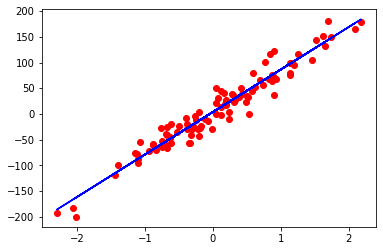

In [35]:
#plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy, predicted,'b')
plt.show()